This project will focus on analysis of where crimes happen in Chicago and how they are affected by various factors. The client(s) can include law
enforcement, the government, or the residents of Chicago. 

It's important to know the pattern of crimes in the city and how they are affected by other factors. For law enforcement, they would be able to allocate 
their limited resources more effectively by sending officers to where they are likely needed the most. While crime pattern analysis is useful, the factors 
that contribute/affect where and what kind of crimes happen are important as well. These factors can include but not limited to: weather, income level, 
time of the day, public transit, poverty levels, unemployment, school closings, and demographics. If there is a correlation between crimes and one or 
more of these factors, actions can be taken to mitigate the situation if possible. With regards to local residents, the analysis can be useful for them 
to avoid certain areas during a certain time period especially when public transit stops are invovled. 

Various data files will be used to help aid the analysis including the main crime data set from city of Chicago data portal. This data set contains 
crime data collected over the course of 21 years between 2001 and 2021 and can be downloaded as a single csv file. The weather data
is collected from NOAA website also between 2001 and 2021. The data is split into two halves because NOAA only allows a certain amount 
information to be downloaded at a time. The file has daily summaries where things like temperature, precipitation, snow, date and coordinates are included.
To explore other factors, I also downloaded the following data sets to aid the analysis: 
School closing data from: school closing data 
Unemployment data from: unemployment data 
Chicago L transit stops from: L stops data 
Census data from 2010 census from US Census Buerau and they include: 
Education, income, poverty levels, and race data broken down by community in Chicago. 

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from google.cloud import bigquery
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
GB = 1000**3
CSA = 'CRIM SEXUAL ASSAULT'
CLSA = 'CRIMINAL SEXUAL ASSAULT'
violent_crimes = ('BATTERY', 'ROBBERY', 'WEAPONS VIOLATION', 'OFFENSE INVOLVING CHILDREN', 'SEX OFFENSE',
                 'CRIM SEXUAL ASSAULT', 'ARSON', 'KIDNAPPING', 'CRIMINAL SEXUAL ASSAULT', 'HOMICIDE', 'HUMAN TRAFFICKING')

dry_run_config = bigquery.QueryJobConfig(dry_run = True)
safe_conifg = bigquery.QueryJobConfig(maximum_bytes = 3*GB)

def get_bytes(query):
    dry_run_job = client.query(query, job_config = dry_run_config)
    print(f'This query will take {dry_run_job.total_bytes_processed / GB}')
    
    
def crimify(df, aux = []):
    if aux:
            df = df.replace({'crime' : {'CRIMINAL SEXUAL ASSAULT' : 'CRIM SEXUAL ASSAULT'}}).groupby(by = ['year', 'crime', *aux]).sum().reset_index()
    else:
        df = df.replace({'crime' : {'CRIMINAL SEXUAL ASSAULT' : 'CRIM SEXUAL ASSAULT'}}).groupby(by = ['year', 'crime']).sum().reset_index()
    return df

def pad(df):
    yr = pd.DataFrame({'year': range(2001, 2022)})
    crimes = pd.DataFrame({'crime' : df.crime.unique()})
    merge = pd.merge(left = yr, right = crimes, how = 'cross')
    df = pd.merge(left = df, right = merge, on = ['year', 'crime'], how = 'right')
    df = df.fillna(0)
    return df

In [3]:
client = bigquery.Client()
dataset_ref = client.dataset('chicago_crime', project = 'bigquery-public-data')
dataset = client.get_dataset(dataset_ref)
tables = list(client.list_tables(dataset))
for table in tables:
    print(table.table_id)

Using Kaggle's public dataset BigQuery integration.
crime


In [4]:
database = '`bigquery-public-data.chicago_crime.crime`'
table_ref = dataset_ref.table('crime')
table = client.get_table(table_ref)
df = client.list_rows(table, max_results = 5).to_dataframe()
df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Cannot use bqstorage_client if max_results is set, reverting to fetching data with the tabledata.list endpoint.
  after removing the cwd from sys.path.


,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,10303371,HY491599,2015-11-06 11:30:00+00:00,049XX S ARCHER AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,"SCHOOL, PUBLIC, BUILDING",True,False,...,14,57,24,1150934.0,1871470.0,2015,2018-02-10 15:50:01+00:00,41.803202,-87.721984,"(41.803201891, -87.72198373)"
1,10422557,HZ160686,2016-02-20 06:00:00+00:00,066XX W RAVEN ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,True,...,41,10,02,1130992.0,1940759.0,2016,2018-02-10 15:50:01+00:00,41.993706,-87.793523,"(41.99370623, -87.793523066)"
2,10480039,HZ218588,2016-04-04 10:00:00+00:00,071XX W GRAND AVE,5001,OTHER OFFENSE,OTHER CRIME INVOLVING PROPERTY,MEDICAL/DENTAL OFFICE,False,False,...,36,18,26,1128422.0,1915191.0,2016,2018-02-10 15:50:01+00:00,41.923589,-87.803558,"(41.923588879, -87.803558209)"
3,10494238,HZ235125,2016-04-04 09:00:00+00:00,045XX S KEELER AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,RESIDENCE,False,False,...,14,57,11,1149112.0,1874270.0,2016,2018-02-10 15:50:01+00:00,41.810921,-87.728594,"(41.810920872, -87.728593692)"
4,10595788,HZ347168,2016-07-13 10:00:00+00:00,023XX S CANAL ST,0530,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,APARTMENT,True,True,...,25,34,04A,1173575.0,1888472.0,2016,2018-02-10 15:50:01+00:00,41.849385,-87.638444,"(41.849384985, -87.638444163)"


In [5]:
table.schema

[SchemaField('unique_key', 'INTEGER', 'REQUIRED', 'Unique identifier for the record.', (), None),
 SchemaField('case_number', 'STRING', 'NULLABLE', 'The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.', (), None),
 SchemaField('date', 'TIMESTAMP', 'NULLABLE', 'Date when the incident occurred. this is sometimes a best estimate.', (), None),
 SchemaField('block', 'STRING', 'NULLABLE', 'The partially redacted address where the incident occurred, placing it on the same block as the actual address.', (), None),
 SchemaField('iucr', 'STRING', 'NULLABLE', 'The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.', (), None),
 SchemaField('primary_type', 'STRING', 'NULLABLE', 'The primary description of the IUCR code.', (), None),
 SchemaField('description', 'STRING', 'NULLABLE', 'The secondary description of the IUCR code, a s

In [6]:
cardinality = f'''
            SELECT year, primary_type as crime, COUNT(1) as total
            FROM {database}
            group by year, primary_type
            ORDER BY year DESC, total DESC
            '''
get_bytes(cardinality)

This query will take 0.147824337


In [7]:
cardinalty_query = client.query(cardinality)
cardinality_df = cardinalty_query.to_dataframe()
cardinality_df

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


,year,crime,total
0,2021,BATTERY,26067
1,2021,THEFT,24126
2,2021,CRIMINAL DAMAGE,16161
3,2021,ASSAULT,12977
4,2021,DECEPTIVE PRACTICE,11175
...,...,...,...
653,2001,PUBLIC INDECENCY,9
654,2001,RITUALISM,8
655,2001,OTHER NARCOTIC VIOLATION,6
656,2001,CONCEALED CARRY LICENSE VIOLATION,1


In [8]:
cardinality_df['crime'].value_counts()

ASSAULT                              21
PROSTITUTION                         21
OBSCENITY                            21
MOTOR VEHICLE THEFT                  21
OTHER OFFENSE                        21
WEAPONS VIOLATION                    21
ARSON                                21
BATTERY                              21
LIQUOR LAW VIOLATION                 21
NARCOTICS                            21
STALKING                             21
CRIMINAL DAMAGE                      21
CRIMINAL SEXUAL ASSAULT              21
HOMICIDE                             21
KIDNAPPING                           21
DECEPTIVE PRACTICE                   21
CRIMINAL TRESPASS                    21
ROBBERY                              21
GAMBLING                             21
OTHER NARCOTIC VIOLATION             21
PUBLIC PEACE VIOLATION               21
BURGLARY                             21
SEX OFFENSE                          21
INTERFERENCE WITH PUBLIC OFFICER     21
THEFT                                21


Domestic violence only reported in one year? This seems highly suspicious, perhaps DV is filled under the OTHER OFFENSE category?

In [9]:
dv = f'''
            SELECT year, primary_type as crime, description
            FROM {database}
            WHERE primary_type = 'DOMESTIC VIOLNECE'
            OR (description like '%DOMESTIC%')
            group by year, crime, description
            '''
get_bytes(dv)

This query will take 0.281993701


In [10]:
dv_query = client.query(dv)
dv_df = dv_query.to_dataframe()
dv_df = dv_df.sort_values(by = 'year')
dv_df

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


,year,crime,description
119,2001,BATTERY,AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST
121,2001,BATTERY,AGGRAVATED DOMESTIC BATTERY
89,2001,BATTERY,DOMESTIC BATTERY SIMPLE
132,2001,DOMESTIC VIOLENCE,DOMESTIC VIOLENCE
130,2002,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON
...,...,...,...
58,2021,BATTERY,AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS ...
104,2021,BATTERY,AGGRAVATED DOMESTIC BATTERY - HANDGUN
88,2021,BATTERY,DOMESTIC BATTERY SIMPLE
126,2021,OTHER OFFENSE,DISCLOSE DOMESTIC VIOLENCE VICTIM LOCATION


In [11]:
dv_df.loc[dv_df['crime'] == 'OTHER OFFENSE']

,year,crime,description
95,2020,OTHER OFFENSE,VIOLATION OF BAIL BOND - DOMESTIC VIOLENCE
94,2021,OTHER OFFENSE,VIOLATION OF BAIL BOND - DOMESTIC VIOLENCE
126,2021,OTHER OFFENSE,DISCLOSE DOMESTIC VIOLENCE VICTIM LOCATION


Here we go, the DV crime was only reported in 2001, whereas all other crimes were reported in all other years. In the other years, it's reported under BATTERY. It also seems to be reported under BATTERY for 2001, with only one incidence of it being reported as 'DOMESTIC VIOLENCE'. Interestingly, there seems to be DOMESTIC VIOLENCE related crimes that are not DOMESTIC VIOLENCE, all ocuring in 2020 - 2021, perhaps suggesting the changing of laws, or beginning to enforece a previously established law, or that the incidences are rare.

The table also has a field called Domestic, as it relates to the definition used by their Domestic Violence law. If you queried with domestic = True, then you get other offenses, such as CRIM SEX ASSAULT, which definitly would seem to fit my understanding of DV. However, you will also get criems such as narcotics use, or the theft of \$300. For my purposes, the domestic column seems to be unhelpful.

Now let's look at the 'Violent Crimes' for an EDA analysis. 
Things I"m interested in:
1. Crimes (types) over the years
2. 'Most Dangerous X', X = ward, community, area
3. Distribution of crimes: Longitude, latitutde

This dataset is fairly small, so I could do this all in a single query, convert to pd, do some math in pds to plot my data. I'll refrain from doing so for two reasons:
1. I'm practicing bigquery, and doing everything in pd defeats the purpose.
2. Let's say that I'm working on a dataset with signicantly more classes. The total number of rows for a query is going to be multiplicative with the number of classes per row (to an approximation, for example, if there are 50 classes in col A and 20 in col B, there should be 50*20 returned rows. However, if 10 of the classes in col B are only associated with one class in col A, then there would be 10 * 50 + 10 rows, which is slightly more than half). Therefore, if this were a larger dataset, then I might need to do multiple queries in order to actually fit inside a pd df.

In [12]:
violent_year_q = f'''
            SELECT DISTINCT year, primary_type as crime, count(primary_type) OVER (Partition by primary_type, year) as offenses,
            100.0 * count(primary_type) OVER (partition by primary_type, year) / count(primary_type) OVER (partition by year) as ratio
            FROM {database}
            WHERE primary_type in {violent_crimes}
            ORDER BY year DESC, offenses DESC
            '''
get_bytes(violent_year_q)

This query will take 0.147824337


In [13]:
violent_year_query = client.query(violent_year_q)
violent_year = violent_year_query.to_dataframe()
violent_year

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


,year,crime,offenses,ratio
0,2021,BATTERY,26067,64.544644
1,2021,WEAPONS VIOLATION,6028,14.925964
2,2021,ROBBERY,4563,11.298470
3,2021,OFFENSE INVOLVING CHILDREN,1214,3.005992
4,2021,CRIMINAL SEXUAL ASSAULT,931,2.305254
...,...,...,...,...
214,2001,CRIM SEXUAL ASSAULT,1782,1.424791
215,2001,ARSON,1010,0.807541
216,2001,KIDNAPPING,933,0.745976
217,2001,HOMICIDE,667,0.533297


I couldn't think of an easy group by  to work with my query, so a parition function works nicely

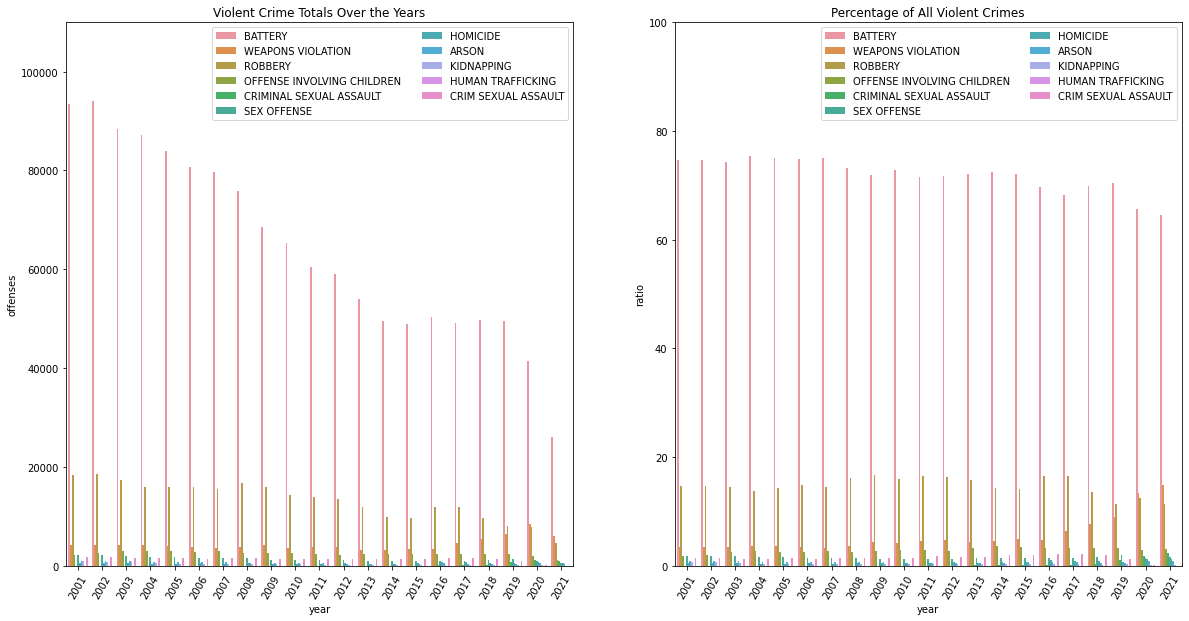

In [14]:
fig, axis = plt.subplots(1, 2, figsize = (20, 10))
axis = axis.flatten()
sns.barplot(x = 'year', y = 'offenses', hue = 'crime', data = violent_year, ax = axis[0])
axis[0].legend(ncol = 2)
axis[0].set_ylim(0, 110000)
axis[0].set_title('Violent Crime Totals Over the Years')
axis[0].set_xticklabels(labels = axis[0].get_xticklabels(), rotation = 60)

sns.barplot(x = 'year', y = 'ratio', hue = 'crime',  data = violent_year, ax = axis[1])
axis[1].legend(ncol = 2)
plt.ylim(0, 100)
axis[1].legend(ncol = 2)
axis[1].set_ylim(0, 100)
axis[1].set_title('Percentage of All Violent Crimes')
axis[1].set_xticklabels(labels = axis[1].get_xticklabels(), rotation = 60);

Battery dominates the  violent crimes, being around 5x more numerous than the next highest, Robbery. Violent crime drastically descreased from 2001 - 2013, while remaining steady from 2013 -> 2018. There's a noticeable drop in 2020, probbaly due to covid, and 2021 still has 25% of the months to go. You'd need a lawyer to go through any possible changes in the laws, how the government is changing their approach to some law enforcement to get a better picture, look at socioecomic changes [this one clearly doesn't require a lawyer], etc..

This graph is a little to unweildy for my tastes, so let's try to make a dynamic plot using plotly.

In [15]:
violent_year.columns

Index(['year', 'crime', 'offenses', 'ratio'], dtype='object')

In [16]:
#plotly has some issues with missing categorical data: DV is missing in all years but 2001, which will cause animation issues, such as bars shifting to places they should not be, and the like.
violent_year = violent_year.drop(violent_year.loc[violent_year['crime'] == 'DOMESTIC VIOLENCE'].index)
violent_year = violent_year.dropna()
violent_year_update = crimify(violent_year)
violent_year = pad(violent_year)
violent_year_update = violent_year_update.sort_values(by = ['year', 'offenses'], ascending = [True, False])


Ok, now we have all the categories, however CRIM SEXUAL ASSAULT and CRIMINAL SEXUAL ASSUALT should be the same. I need to keep both in the violent_crimes in order to get both from bigquery. I'm going to combine the two together.

In [17]:
y_limit = max(violent_year['offenses']) * 1.1
crime_counts = px.bar(violent_year_update, x = 'crime', y = 'offenses', color = 'crime', animation_frame = 'year', title = 'Number of Offenses for Each Crime', width = 1000, height = 500)
crime_counts.update_layout(
                        yaxis_range = (0, y_limit),
                        title = {'x' : 0.5},
                        xaxis_title = 'Crime',
                        sliders = [{'yanchor' : 'bottom', 'y' : -0.4}])
crime_counts.show()

Anywho, most crimes seem to be decreasing with time, as noted with the sns plot, however, the WEAPONS VIOLATION shows an increase in 2019 and 2020 compared to 2001 (by about 50%), even overtaking ROBBERY. The increase in the WEAPONS VIOLATION : ROBBERY ratio may have to do with Covid 19. With increased unemployment, more people will remain home, which would deter potential thieves? We'll have to look at the locations of the crimes. However that would seem to contradict the rise in WEAPONS VIOLATIONS.

In [18]:
violent_location_q = f'''
            SELECT DISTINCT year, primary_type,  location_description as location,
            count(primary_type) OVER (Partition by year, location_description, primary_type) as offenses,
            100.0 * COUNT(primary_type) OVER (PARTITION by year, location_description, primary_type) / COUNT(primary_type) OVER (PARTITION by year, primary_type) as ratio
            FROM {database}
            WHERE primary_type in {tuple(violent_crimes)}
            ORDER BY year DESC, offenses DESC
            '''
get_bytes(violent_location_q)

This query will take 0.245041623


In [19]:
violent_location_query = client.query(violent_location_q)
violent_location = violent_location_query.to_dataframe()
violent_location.head()

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning:

Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.



,year,primary_type,location,offenses,ratio
0,2021,BATTERY,APARTMENT,8616,33.053286
1,2021,BATTERY,RESIDENCE,4535,17.397476
2,2021,BATTERY,STREET,4167,15.985729
3,2021,WEAPONS VIOLATION,STREET,3504,58.128733
4,2021,BATTERY,SIDEWALK,2699,10.354088


In [20]:
violent_location.rename(columns = {'primary_type' : 'crime'}, inplace = True)
violent_location['location'].value_counts()

APARTMENT                 214
STREET                    212
ALLEY                     205
RESIDENCE                 198
VEHICLE NON-COMMERCIAL    187
                         ... 
PUBLIC GRAMMAR SCHOOL       1
LIVERY AUTO                 1
TRUCKING TERMINAL           1
KENNEL                      1
FUNERAL PARLOR              1
Name: location, Length: 212, dtype: int64

There are over 200 location types where crime has occured, with several having only one crime ever having occured there, implying that the specificity of the locations is not necessarily consistent. Although, I could easily see places like KENNEL having only one recorded crime in 20 yrs.

To adress this issue, I'm going to have two graphs, one in which I address BATTERY, ROBBERY, ARSON, HOMICIDE - crimes where somebody is more likely to get hurt, and another with SEX OFFENSES and CRIM SEXUAL ASSAULT. Once again, I need to modify the CRIM SEXUAL ASSAULT due to it being the same (but split) as CRIMINAL SEXUAL ASSAULT.

In [21]:
#Initially this was a loop much like the previous iteration for crime rates, however that took 11s to execute. Profiling told me that masking took up a while, so I moved the appropriate masks out of the loops I could, and then that took 5s.
#Replace + groupby is significantly faster
violent_location = violent_location.copy()
violent_location = violent_location.replace({'crime' : {CLSA: CSA}}).groupby(by = ['year', 'location', 'crime'], sort = False).sum().reset_index()
right = violent_location.groupby(by = ['year', 'crime'], sort = False).sum().reset_index()

#I wonder if there's any easier way to do this
violent_location = pd.merge(left = violent_location, right = right,
                                  on = ['year', 'crime'])
violent_location['ratio'] = violent_location['offenses_x'] /violent_location['offenses_y'] * 100
violent_location.drop(columns = ['offenses_y', 'ratio_x', 'ratio_y'], inplace = True)
violent_location.rename(columns = {'offenses_x' : 'offenses'}, inplace = True)
violent_location.loc[violent_location.crime == CSA]


,year,location,crime,offenses,ratio
241,2021,APARTMENT,CRIM SEXUAL ASSAULT,323,34.731183
242,2021,RESIDENCE,CRIM SEXUAL ASSAULT,185,19.892473
243,2021,HOSPITAL BUILDING / GROUNDS,CRIM SEXUAL ASSAULT,68,7.311828
244,2021,HOTEL / MOTEL,CRIM SEXUAL ASSAULT,57,6.129032
245,2021,STREET,CRIM SEXUAL ASSAULT,51,5.483871
...,...,...,...,...,...
9882,2001,DEPARTMENT STORE,CRIM SEXUAL ASSAULT,1,0.055310
9883,2001,HIGHWAY/EXPRESSWAY,CRIM SEXUAL ASSAULT,1,0.055310
9884,2001,CTA PLATFORM,CRIM SEXUAL ASSAULT,1,0.055310
9885,2001,CHA HALLWAY / STAIRWELL / ELEVATOR,CRIM SEXUAL ASSAULT,1,0.055310


The locations tag has over 200 entries, some of which I would consider degenerate. For example, RESIDENCE, RESIDENTIAL-GARAGE, APARTMENT, etc, I would characterize as RESIDENCE. (SCHOOL, BUILDING, PUBLIC), (SCHOOL, GROUNDS, PUBLIC), I would also consider the same. For some thresholds, combining these wouldn't matter, although for the RESIDENCE example, RESIDENCE and APARTMENT are hotspots for violent crimes, so combining them together helps to focus the trends, and a similar issue happens with the SCHOOLs categories. I'm going to take a few categories, which I believe are similar and give the same tag. A group by, followed by an index reset should update the DF as expected. I'm going to also have a function where it will set categories under the desired plotting threshold to other.

In [22]:
def location_update(df, contains, new_value):
    if type(contains) == set:
        df.loc[df.query('(location in @contains)').index, 'location'] = new_value
    else:
        df.loc[df['location'].str.contains(contains), 'location'] = new_value
    return df

In [23]:
#Preparing a df for plotly, which requires having all categoricals at all stages, it will also prevent some wonky animations, such as parts of barplots flying ontop of other barplots
violent_location = violent_location.drop(index = violent_location.loc[violent_location.crime == 'DOMESTIC VIOLENCE'].index)
violent_location = location_update(violent_location, 'HOSPITAL', 'HOSPITAL')
violent_location = location_update(violent_location, 'CTA ', 'CTA RELATED')
violent_location = location_update(violent_location, 'CHA ', 'CHA RELATED')
violent_location = location_update(violent_location, 'VEHICLE', 'VEHICLE')
violent_location = location_update(violent_location, 'TRUCK', 'VEHICLE')
violent_location = location_update(violent_location, 'TAXI', 'VEHICLE')
violent_location = location_update(violent_location, 'AUTO', 'VEHICLE')
violent_location = location_update(violent_location, 'SCHOOL', 'SCHOOL')
violent_location = location_update(violent_location, 'COLLEGE', 'SCHOOL')
violent_location = location_update(violent_location, 'RESIDENTIAL', 'HOME/RESIDENCE')
violent_location = location_update(violent_location, 'HOUSE', 'HOME/RESIDENCE')
violent_location = location_update(violent_location, {'HOME', 'APARTMENT', 'RESIDENCE'}, 'HOME/RESIDENCE')
violent_location = location_update(violent_location, 'RESIDENCE', 'HOME/RESIDENCE')
violent_location = location_update(violent_location, 'HOTEL', 'HOTEL/MOTEL')
violent_location = location_update(violent_location, 'MOTEL', 'HOTEL/MOTEL')
violent_location = location_update(violent_location, {'HOME', 'APARTMENT', 'RESIDENCE'}, 'HOME/RESIDENCE')
violent_location = location_update(violent_location, 'CHURCH', 'FAITH RELATED')
violent_location = location_update(violent_location, 'CEMETARY', 'FAITH RELATED')
violent_location = location_update(violent_location, 'FUNERAL', 'FAITH RELATED')
violent_location = location_update(violent_location, 'OTHER', 'OTHER')
violent_location = location_update(violent_location, 'ALLEY', 'STREET')
violent_location = location_update(violent_location, 'SIDEWALK', 'STREET')

violent_location = violent_location.groupby(by = ['year', 'crime', 'location']).sum().reset_index()
violent_location = location_update(violent_location, 'AIRPORT', 'AIRPORT RELATED')

violent_location['location'].nunique()
violent_location.loc[(violent_location.crime == 'KIDNAPPING') & (violent_location.location == 'SCHOOL')]

,year,crime,location,offenses,ratio
165,2001,KIDNAPPING,SCHOOL,16,1.714898
483,2002,KIDNAPPING,SCHOOL,23,2.774427
791,2003,KIDNAPPING,SCHOOL,22,3.120567
1091,2004,KIDNAPPING,SCHOOL,12,2.489627
1388,2005,KIDNAPPING,SCHOOL,8,2.056555
1695,2006,KIDNAPPING,SCHOOL,13,3.834808
1993,2007,KIDNAPPING,SCHOOL,18,5.471125
2297,2008,KIDNAPPING,SCHOOL,13,3.621170
2595,2009,KIDNAPPING,SCHOOL,8,2.730375
2904,2010,KIDNAPPING,SCHOOL,7,2.236422


In [24]:
violent_location = violent_location.groupby(by = ['year', 'crime', 'location']).sum().reset_index()

In [25]:
def get_locations(df, crimes, min_ratio):
    df = df.copy() #Copy here prevents overriding the value by the next line
    locs = set(df.query('(crime in @crimes) & (ratio >= @min_ratio)').location.unique())
    df.loc[df.query('location not in @locs').index, 'location'] = 'OTHER'
    df = df.groupby(by = ['year', 'location', 'crime']).sum().reset_index()
    temp = df.query('(crime in @crimes)')
    yr_df = pd.DataFrame({'year': range(2001, 2022)})
    crime_df = pd.DataFrame({'crime' : temp['crime'].unique()})
    loc_df = pd.DataFrame({'location' : temp['location'].unique()})
    merged = pd.merge(left = yr_df, right = crime_df, how = 'cross')
    merged = pd.merge(left = merged, right = loc_df, how = 'cross')
    temp2 = pd.merge(left = temp, right = merged, on = ['year', 'crime', 'location'], how = 'right')
    temp2 = temp2.fillna(0)
    return temp2

In [26]:
not_battery_mask = (violent_location.crime != 'BATTERY') & (violent_location.crime != 'HOMICIDE') 
not_sex_mask = (violent_location.crime != 'HUMAN TRAFFICKING') & (violent_location.crime != 'CRIM SEXUAL ASSAULT') & (violent_location.crime != 'SEX OFFENSE')
vl_plot = get_locations(violent_location, violent_location['crime'].loc[not_battery_mask & not_sex_mask].unique(), min_ratio = 5)
#vl_plot.loc[(vl_plot.crime == 'KIDNAPPING') & (vl_plot.location == 'SCHOOL')]

In [27]:
location_counts = px.density_heatmap(vl_plot, x = 'crime', y = 'location', z = 'ratio', animation_frame = 'year', animation_group = 'crime', range_color = (0, 30), labels = {'location': 'Location of Offenses','crime': 'Crime'}, title = '<b>Distribution of Offenses</b> <br>(min 5%)', height = 750)
location_counts.update_layout(title = {'x': 0.5})
location_counts.show()

The above graph is for nonbattery/robbery/sex crimes. Interestingly arson has percentage of offenses being on the street or related to vehicles. Offenses involving children mostly occuring in the home is no surprise, however most kidnapped children are kidnapped off the street (>50%) according to this data, with hardly any being kidnapped from school (most years < 5%)? In the cases of child kidnappings, I tend to think of it as a parent taking the child running away from the other parent, or in cases of divorce, or a relative kidnapping them by arriving at their school and taking them without permission/knowledge of their parent. This certainly is an interesting statistic.

WEAPONS VIOLATIONS mostly occur on the street, probably due to an illegal carrying, however, a lot of ROBBERY and KIDNAPPING also occur on the street, so perhaps they are related? One description for a WEAPONS VIOLATION charge is unlawful use of a weapon, which happened in a school, so to get more information, I'd have to go through the descriptions which may involve a lot of data cleaning, and not too interested in doing for the time being.

In [28]:
vl_plot_bat = get_locations(violent_location, violent_location.loc[~not_battery_mask, 'crime'].unique(), min_ratio = 5)
vl_plot_bat = vl_plot_bat.fillna(0)

In [29]:
location_counts_bat = px.density_heatmap(vl_plot_bat, x = 'crime', y = 'location', z = 'ratio', animation_frame = 'year', animation_group = 'crime', range_color = (0, 50), labels = {'location': 'Location of Offenses','crime': 'Crime'}, title = 'Number of offenses in each location \n (min 5%)')
location_counts_bat.update_layout(title = {'x': 0.5})
location_counts_bat.show()

Most BATTERY occuring at home is congruent with the fact that this includes DOMESTIC VIOLENCE. However, most HOMOCIDE occurs in the street (> 50% most years), whereas I would typically expect them to occur at home. However, the homicides occuring in vehicles occur at nearly the same rate as that occuring at homes. The high rate for STREET HOMICIDES makes me think that these may be gang/crime related, which could be supported by most weapons violation charges also occuring on the streets. Again, this would involve looking more into the description, and I suspect that field is too sparse to draw any conclusions. Finally, let's look at the sex crimes.

In [30]:
vl_plot_sex = get_locations(violent_location, violent_location.loc[~not_sex_mask, 'crime'].unique(), min_ratio = 5)
vl_plot_sex = vl_plot_sex.fillna(0)
location_counts_sex = px.density_heatmap(vl_plot_sex, x = 'crime', y = 'location', z = 'ratio', animation_frame = 'year', animation_group = 'crime', range_color = (0, 50), labels = {'location': 'Location of Offenses','crime': 'Crime'}, title = 'Number of offenses in each location (min 5%)')
location_counts_sex.update_layout(title = {'x': 0.5})
location_counts_sex.show()

HUMAN TRAFFICKING is a relatively rare crime, which is why it's absent most years. I believe that Atlantla, Georgia is a hotspot due to its airport.

The deal with SEXUAL ASSAULT is that it's underreported. We can see that most of the cases occur at home, which isn't too surprising. Around 12% occur in the street, and around 6-7% occur in hospitals and hotels. However, I suspect that these ratios are off for the following reason. If somebody is assaulted on the streets, the assailant is most likely unknown to the victim, and thus there is a lower barrier to reporting the crime. Offenses that occur at home are more likely to be done by a family member/friend, which has a larger barrier to report, especially if the victim is reliant on financial support of the perpatrator, and then there are other issues such as the victim's other family members not believing the victim, etc. I have no insight on the offenses occuring hospitals/hotels. The situation with hospitals is tricky, especially if the perpetrator is the doctor/in charge of the victim's health, where reporting the crime could potentially be dangeorus towards the victim. However, if the perpatrator is unknown, then the victim would be more likely to report. 

In [31]:
crim_hotel_query = f'''
                    SELECT primary_type, description
                    FROM {database}
                    WHERE ((location_description LIKE '%HOTEL%')
                    OR (location_description LIKE '%MOTEL%'))
                    AND (primary_type LIKE 'CRIM% SEXUAL%')
                    '''
get_bytes(crim_hotel_query)

This query will take 0.320075883


In [32]:
crim_hotel = client.query(crim_hotel_query)
crim_hotel_des = crim_hotel.to_dataframe()

/opt/conda/lib/python3.7/site-packages/google/cloud/bigquery/client.py:440: UserWarning:

Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.



In [33]:
crim_hotel_des['description'].value_counts()

NON-AGGRAVATED                             689
AGGRAVATED: OTHER                           92
AGGRAVATED: HANDGUN                         28
ATTEMPT NON-AGGRAVATED                      23
AGGRAVATED - OTHER                          21
PREDATORY                                   15
AGGRAVATED: KNIFE/CUT INSTR                 12
AGGRAVATED - KNIFE / CUTTING INSTRUMENT      6
AGGRAVATED - HANDGUN                         5
ATTEMPT AGG: HANDGUN                         4
ATTEMPT AGG: OTHER                           4
AGGRAVATED: OTHER DANG WEAPON                3
ATTEMPT AGG: KNIFE/CUT INSTR                 2
ATTEMPT AGG: OTHER FIREARM                   1
ATTEMPT AGG: OTHER DANG WEAPON               1
Name: description, dtype: int64

As expected, this wasn't too helpful. Most of the CRIM SEXUAL ASSAULT in hotels is non-aggravated, which could mean a variety of things such as a couple on holiday, and one spouse assaults the other, if somebody assaults a coworker during a business trip, etc. The aggravated cases I would imagine that the perpatrator drags the victim to a hotel they are already staying at, or the perpatrator breaking into the hotel room.

In [34]:
crim_hospital_query = f'''
                    SELECT primary_type, description
                    FROM {database}
                    WHERE (location_description LIKE '%HOSPITAL%')
                    AND (primary_type LIKE 'CRIM% SEXUAL%')
                    '''
crim_hospital = client.query(crim_hospital_query)
crim_hospital_df = crim_hospital.to_dataframe()

In [35]:
crim_hospital_df.value_counts()

primary_type             description                        
CRIM SEXUAL ASSAULT      NON-AGGRAVATED                         328
CRIMINAL SEXUAL ASSAULT  NON-AGGRAVATED                         141
CRIM SEXUAL ASSAULT      AGGRAVATED: OTHER                       39
CRIMINAL SEXUAL ASSAULT  AGGRAVATED - OTHER                      19
CRIM SEXUAL ASSAULT      ATTEMPT NON-AGGRAVATED                   9
                         PREDATORY                                8
CRIMINAL SEXUAL ASSAULT  PREDATORY                                5
CRIM SEXUAL ASSAULT      AGGRAVATED: HANDGUN                      4
CRIMINAL SEXUAL ASSAULT  ATTEMPT AGGRAVATED - OTHER               3
                         ATTEMPT NON-AGGRAVATED                   3
CRIM SEXUAL ASSAULT      AGGRAVATED: KNIFE/CUT INSTR              2
CRIMINAL SEXUAL ASSAULT  AGGRAVATED - HANDGUN                     2
CRIM SEXUAL ASSAULT      AGGRAVATED: OTHER DANG WEAPON            1
                         ATTEMPT AGG: KNIFE/CUT INSTR  

This is also unhelpful. The hospital query contains locations like building, grounds, which could perhaps shed some more light to the victims identities, but not much. The fact that most of these are non-aggravated makes sense to me, however it doesn't really reveal what happens, ie the doctor in charge of an interned patient, vs random person assaulting an interned patient, etc. I would assume that the aggravated charges are against nurses/other hospital staff, but again, there's not a lot of information to go off of. 

Now I'm going to see where (physically), these crimes occur. While querying the ward/community center could give a general idea, the lat/long coordinates could map out the specifics of what area is 'bad'

In [36]:
lat_long_query = f'''
                WITH x AS
                    (SELECT year, primary_type as crime, ROUND(latitude, 3) as latitude, ROUND(longitude, 3) as longitude,
                    COUNT(primary_type) as offenses
                    FROM {database}
                    WHERE primary_type IN {violent_crimes}
                    AND latitude IS NOT NULL
                    AND longitude IS NOT NULL
                    GROUP BY year, crime, latitude, longitude),
                y AS
                    (SELECT  x.*, DENSE_RANK() OVER (PARTITION BY x.year, x.crime
                    ORDER BY offenses DESC) as rank
                    FROM x)
                SELECT y.*
                FROM y
                WHERE y.rank <= 15
                AND y.offenses >= 2
                AND latitude IS NOT NULL
                AND longitude IS NOT NULL
                ORDER BY year DESC, offenses DESC, latitude, longitude
                '''

lat_long_gun_query = f'''
                WITH x AS
                    (SELECT year, primary_type as crime, ROUND(latitude, 3) as latitude, ROUND(longitude, 3) as longitude,
                    COUNT(primary_type) as offenses
                    FROM {database}
                    WHERE primary_type IN {violent_crimes}
                    AND latitude IS NOT NULL
                    AND longitude IS NOT NULL
                    AND description LIKE '%GUN%'
                    GROUP BY year, crime, latitude, longitude),
                y AS
                    (SELECT  x.*, DENSE_RANK() OVER (PARTITION BY x.year, x.crime
                    ORDER BY offenses DESC) as rank
                    FROM x)
                SELECT y.*
                FROM y
                WHERE ((y.rank <= 10
                AND y.offenses >= 3)
                OR (y.crime LIKE 'CRIM% SEXUAL ASSAULT'))
                AND latitude IS NOT NULL
                AND longitude IS NOT NULL
                ORDER BY year DESC, offenses DESC, latitude, longitude
                '''
get_bytes(lat_long_query), get_bytes(lat_long_gun_query)
#The second query takes more memory than the first, despite having an additional constraint, probably due to scanning another column

This query will take 0.264911665
This query will take 0.399081029


(None, None)

In [37]:
lat_long = client.query(lat_long_query)
lat_long_df = lat_long.to_dataframe()

lat_long_gun = client.query(lat_long_gun_query)
lat_long_gun_df = lat_long_gun.to_dataframe()

In [38]:
lat_long_df = crimify(lat_long_df, ['latitude', 'longitude'])
lat_long_gun_df = crimify(lat_long_gun_df, ['latitude', 'longitude'])
lat_long_df = lat_long_df.sort_values(by = 'year')
lat_long_gun_df = lat_long_gun_df.sort_values(by = 'year')

In [39]:
not_battery_mask_lat_long = (lat_long_df.crime != 'BATTERY') & (lat_long_df.crime != 'HOMICIDE') 
not_sex_mask_lat_long = (lat_long_df.crime != 'HUMAN TRAFFICKING') & (lat_long_df.crime != 'CRIM SEXUAL ASSAULT') & (lat_long_df.crime != 'SEX OFFENSE')

not_battery_mask_lat_long_gun = (lat_long_gun_df.crime != 'BATTERY') & (lat_long_gun_df.crime != 'HOMICIDE') 
not_sex_mask_lat_long_gun = (lat_long_gun_df.crime != 'HUMAN TRAFFICKING') & (lat_long_gun_df.crime != 'CRIM SEXUAL ASSAULT') & (lat_long_gun_df.crime != 'SEX OFFENSE')

normal_crime_lat_long = pad(lat_long_df[not_battery_mask_lat_long & not_sex_mask_lat_long])
normal_crime_lat_long_gun = pad(lat_long_gun_df[not_battery_mask_lat_long_gun & not_sex_mask_lat_long_gun])
normal_crime_lat_long_gun = normal_crime_lat_long_gun.replace({'ROBBERY': 'ROBBERY WITH GUN', 'WEAPONS VIOLATION' : 'WEAPONS VIOLATION WITH GUN'})
ncll = pd.merge(left = normal_crime_lat_long, right = normal_crime_lat_long_gun, on = ['year', 'latitude', 'longitude', 'offenses', 'crime'], how = 'outer')

bat_lat_long = pad(lat_long_df[~not_battery_mask_lat_long])
bat_lat_long_gun = pad(lat_long_gun_df[~not_battery_mask_lat_long_gun])
bat_lat_long_gun = bat_lat_long_gun.replace({'BATTERY': 'BATTERY WITH GUN', 'HOMICIDE' : 'HOMICIDE WITH GUN'})
bll = pd.merge(left = bat_lat_long, right = bat_lat_long_gun, on = ['year', 'latitude', 'longitude', 'offenses', 'crime'], how = 'outer')


sex_lat_long = pad(lat_long_df[~not_sex_mask_lat_long])
sex_lat_long_gun = pad(lat_long_gun_df[~not_sex_mask_lat_long_gun])
sex_lat_long_gun = sex_lat_long_gun.replace({'SEX OFFENSE': 'SEX OFFENSE WITH GUN', 'CRIM SEXUAL ASSAULT' : 'CRIM SEXUAL ASSAULT WITH GUN', 'HUMAN TRAFFICKING' : 'HUMAN TRAFFICKING WITH GUN'})
sll = pd.merge(left = sex_lat_long, right = sex_lat_long_gun, on = ['year', 'latitude', 'longitude', 'offenses', 'crime'], how = 'outer')

ncll.loc[ncll.offenses == 0, 'offenses'] = 0.001 #Arson, for example, is 0 until 2003, and thus would not show on plotly correctly, unless you manually stopped on 2003, and disabled/reenabled it. This solves that headache
bll.loc[ncll.offenses == 0, 'offenses'] = 0.001
sll.loc[ncll.offenses == 0, 'offenses'] = 0.001

In [40]:
ncll_count = px.scatter(ncll, x = 'longitude', y = 'latitude', color = 'crime',
                        color_discrete_map = {'WEAPONS VIOLATION' : 'blue', 'ROBBERY' : 'red', 'WEAPONS VIOLATION WITH GUN' : 'black', 'ROBBERY WITH GUN': 'black', 'ARSON' : 'orange'},
                        size = 'offenses', animation_frame = 'year', title = 'Location of Violent Crimes', width = 1000, height = 750)
ncll_count.update_layout(title = {'x': 0.5},
                        xaxis_range = (-87.95, -87.55),
                        yaxis_range = (41.65, 42),
                         transition = {'duration' : 6000}
                        )
ncll_count.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 10000
ncll_count.show()

While the data for the non-black points are cut off after a certain threshold, it doesn't seem to effect the conclusion: the amount of crimes at a location does not seem to directly effect the amount of guns used in that location. For example, in 2012, there are a lot of locations with more ROBBERY without guns, while the gun use is usedmore in areas with less ROBBERY (this is a micro picture). For example, at LAT = 41.751, LONG = -87.625, there are 4 ROBBERY WITH GUN, and 36 total ROBBERY. North of that, at Lat > 41.85, LONG >87.675 there is hardly any ROBBERY WITH GUN.

The other thing to notice, is that crime is mostly confined into two areas, the first is around LAT (41.85 -> 41.9), LONG(-87.7 -> -87.8) and Lat (41.7 -> 41.9), LONG (-87.55 -> -87.7)

In [41]:
bll_count = px.scatter(bll, x = 'longitude', y = 'latitude', color = 'crime',
                        color_discrete_map = {'BATTERY WITH GUN' : 'black', 'HOMICIDE WITH GUN': 'black', 'ARSON' : 'orange'},
                        size = 'offenses', animation_frame = 'year', title = 'Location of Violent Crimes', width = 1000, height = 750)
bll_count.update_layout(title = {'x': 0.5},
                        xaxis_range = (-87.95, -87.55),
                        yaxis_range = (41.65, 42),
                         transition = {'duration' : 6000}
                        )
bll_count.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 3000
bll_count.show()

So for the more 'violent' of the violent crimes, HOMICIDE and BATTERY, guns were not recorded as being used for HOMICIDE which I find to be off, and HOMICIDE is very rare to begin with, although the numbers seem too low to me, and no other category would cover it. On the other hand, locations of high battery offenses are pretty divorced from where the battery's commited with guns are. Surprisingly, the number of guns used in ROBBERY is higher than that of BATTERY despite BATTERY having a significanlty higher number of offenses.

In [42]:
sll_count = px.scatter(sll, x = 'longitude', y = 'latitude', color = 'crime',
                        color_discrete_map = {'CRIM SEXUAL ASSAULT WITH GUN' : 'black'},
                        size = 'offenses', animation_frame = 'year', title = 'Location of Violent Crimes', width = 1000, height = 750)
sll_count.update_layout(title = {'x': 0.5},
                        xaxis_range = (-87.95, -87.55),
                        yaxis_range = (41.65, 42),
                         transition = {'duration' : 6000}
                        )
sll_count.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 3000
sll_count.show()